Tenemos un data set variado sobre distintos habitos de los estudiantes

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

data = pd.read_csv("./exams.csv")
data.rename(columns={'race/ethnicity':'race', 'parental level of education':'parent_education', 'test preparation course':'prep_course', 'math score':'math_score', 'reading score':'reading_score','writing score':'writing_score'}, inplace=True)
data.head()

,gender,race,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Data exploration

In [20]:
# cantidad de datos nulls
data.isnull().sum()

gender              0
race                0
parent_education    0
lunch               0
prep_course         0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [21]:
columnas = data.columns #ver las columnas que tenemos

In [22]:
def uniqueValues(dataframe, id_column):
    """imprime los unique values de cada columna"""
    print(f'data column: {dataframe.columns[id_column]}')
    print(f'{np.unique(dataframe[dataframe.columns[id_column]] )}')

In [23]:
for i in range(len(data.columns)):
    uniqueValues(data, i)

data column: gender
['female' 'male']
data column: race
['group A' 'group B' 'group C' 'group D' 'group E']
data column: parent_education
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
data column: lunch
['free/reduced' 'standard']
data column: prep_course
['completed' 'none']
data column: math_score
[ 15  20  21  23  24  25  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100]
data column: reading_score
[ 25  27  30  32  33  34  35  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 10

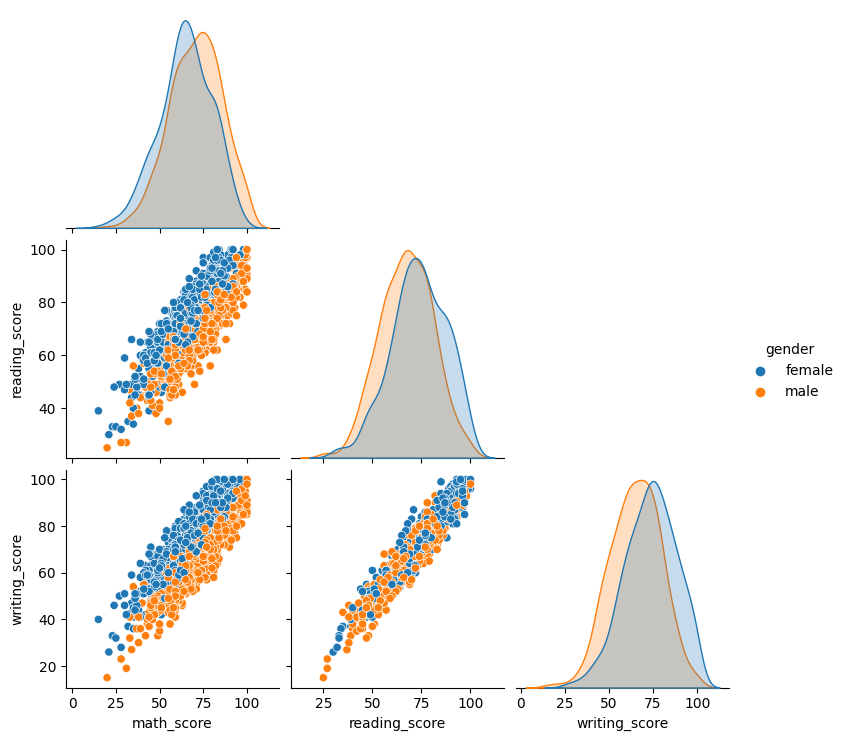

In [24]:
# plot que muestra las relaciones
sns.pairplot(data, hue="gender", corner=True)

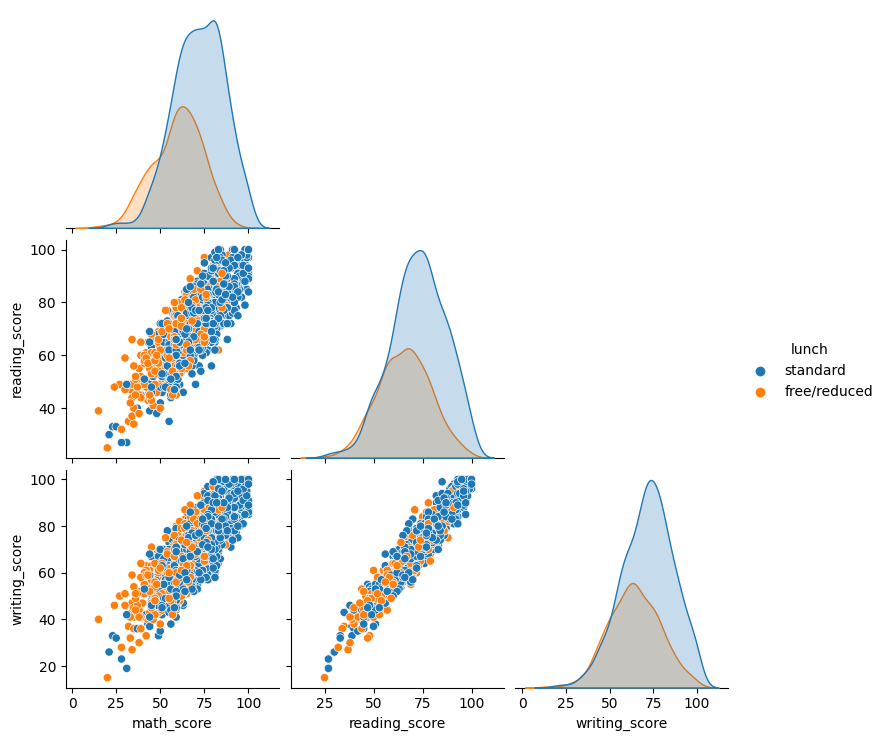

In [25]:
sns.pairplot(data, hue="lunch", corner=True)

puede haber una correlacion en que una persona con mas dinero para comida puede tener una mejor relacion; por ello no podemos sacar muchas conclusione

<Axes: xlabel='math_score', ylabel='Density'>

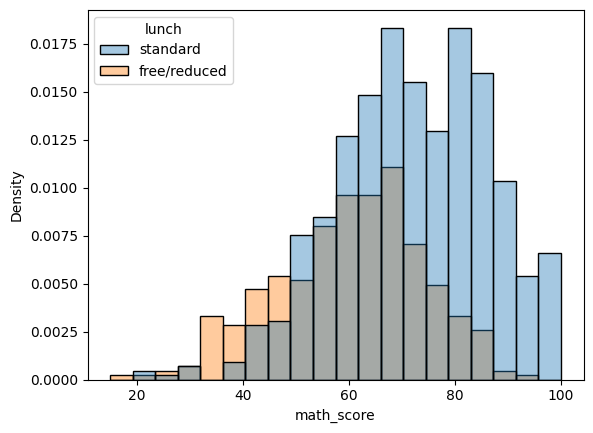

In [26]:
# veamos el histograma entre lso datos
sns.histplot(data=data, hue='lunch', x='math_score', alpha=0.4, stat='density')

# https://seaborn.pydata.org/generated/seaborn.histplot.html

## Analisis de los datos

In [44]:
# lo usaremos para cambiar etiquetas unicas a numero

le_g = LabelEncoder();
data.gender = le_g.fit_transform(data.gender);

le_r = LabelEncoder();
data.race = le_r.fit_transform(data.race);

le_pe = LabelEncoder();
data.parent_education = le_pe.fit_transform(data.parent_education);

le_lunch = LabelEncoder();
data.lunch = le_lunch.fit_transform(data.lunch);

le_pc = LabelEncoder();
data.prep_course = le_pc.fit_transform(data.prep_course);



In [43]:
data.head()

,gender,race,parent_education,lunch,prep_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


Pero aqui nos enfrentamos con el problema de que le estamos dando un orden a una categoria que no la tenia orginalmennte
- el genero no tiene orden
- la raza no tiene orden
- la educacion posee si posee un orden, pero estara correcto?

In [29]:
le_lunch.inverse_transform([0,1])

array(['free/reduced', 'standard'], dtype=object)

In [33]:
le_pe.inverse_transform([i for i in range(len(le_pe.classes_))])

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

## Definir que entreno

In [ ]:
columnas = data.columns

In [49]:
x = data[columnas[:-3]]
x.head()

,gender,race,parent_education,lunch,prep_course
0,0,3,4,1,0
1,1,3,0,1,1
2,0,3,4,0,1
3,1,1,4,0,1
4,0,3,0,1,1


In [48]:
y= data[columnas[-3:]]
y.head()

,math_score,reading_score,writing_score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86


In [ ]:
x, y = data

### Dividir los datos


In [52]:
N = len(data)
print(f"Tenemos {N} datos")

test_size = 0.20

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_size)
len(y_train)

Tenemos 1000 datos


800

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# vamos a entrenar los puntajes de matematica

math_scores_train = np.array(y_train.iloc[:,0])
math_scores_train = math_scores_train.reshape((-1,))

math_scores_test = np.array(y_test.iloc[:,0])
math_scores_test = math_scores_test.reshape((-1,))

In [104]:
modelo = RandomForestClassifier(criterion="entropy")

modelo.fit(x_train.values, math_scores_train)

RandomForestClassifier(criterion='entropy')

In [105]:
# predecimos los valores
math_pred = modelo.predict(x_test.values) 

In [106]:
from sklearn.model_selection import cross_val_score

cross_val_score(modelo, x_train.values, math_scores_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.03125, 0.04375, 0.01875, 0.05   , 0.025  ])

In [107]:
modelo.score(x_train.values, math_scores_train)

0.3075

In [108]:
# ahora a probar con el testing
modelo.score(x_test.values, math_scores_test)

0.015

Hemos logrado utilizar el modelo; sin embargo :

Vemos que no estamos obteniendo buenos entrenamientos ni cross validation;



## Otro ejercicio
Ahora probemos predecir la prueba teniendo conocimienot de las otras

In [113]:
mathscore = y.iloc[:,0]
readwritescore = y.iloc[:,1:]

# luego los pasamos a numpy
mathscore = np.array(mathscore).reshape( (-1,) )
readwritescore = np.array(readwritescore)

# dividimos lo datos
rw_train, rw_test, m_train, m_test = train_test_split(readwritescore, mathscore, test_size=0.2)

In [114]:
intermodel = RandomForestClassifier(criterion="entropy", max_depth = 10)

In [116]:
intermodel.fit(rw_train, m_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [119]:
intermodel.score(rw_train, m_train)
intermodel.score(rw_test, m_test)

0.02

In [134]:
def train_and_graph_forest(maximum_depth, criterion_used):
    depth_array = [i for i in range(1, maximum_depth)]
    train_score = []
    test_score = []

    for depth in depth_array:
        intermodel = RandomForestClassifier(criterion=criterion_used, max_depth = depth,max_features = "sqrt")
        intermodel.fit(rw_train, m_train)
        train_score.append(intermodel.score(rw_train, m_train))
        test_score.append(intermodel.score(rw_test, m_test))


    plt.plot(depth_array, train_score, label="train score")
    plt.plot(depth_array, test_score, label="test score")
    plt.title(f"Random Forest with cretion {criterion_used}")
    plt.xlabel("depth")
    plt.ylabel("score")
    plt.show()


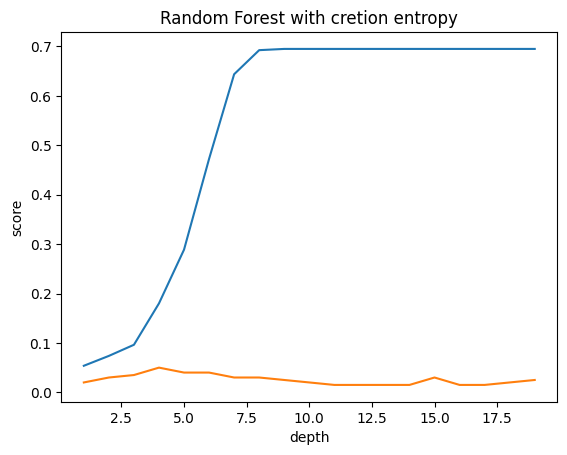

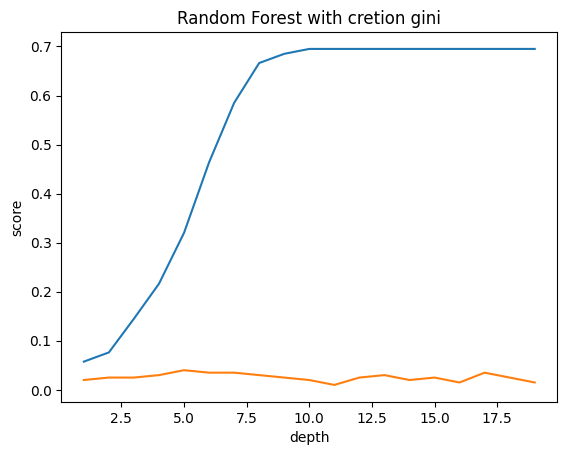

In [135]:
train_and_graph_forest(maximum_depth = 20, criterion_used = "entropy")

train_and_graph_forest(maximum_depth = 20, criterion_used = "gini")

In [130]:
def train_and_graph_forest_leafs(maximum_features, criterion_used):
    features_array = [i for i in range(1, maximum_features)]
    train_score = []
    test_score = []

    for features in features_array:
        intermodel = RandomForestClassifier(criterion=criterion_used, max_features = "sqrt", min_samples_leaf=features)
        intermodel.fit(rw_train, m_train)
        train_score.append(intermodel.score(rw_train, m_train))
        test_score.append(intermodel.score(rw_test, m_test))


    plt.plot(features_array, train_score, label="train score")
    plt.plot(features_array, test_score, label="test score")
    plt.title(f"Random Forest with criterion {criterion_used}")
    plt.xlabel("min_samples_leaf")
    plt.ylabel("score")
    plt.show()

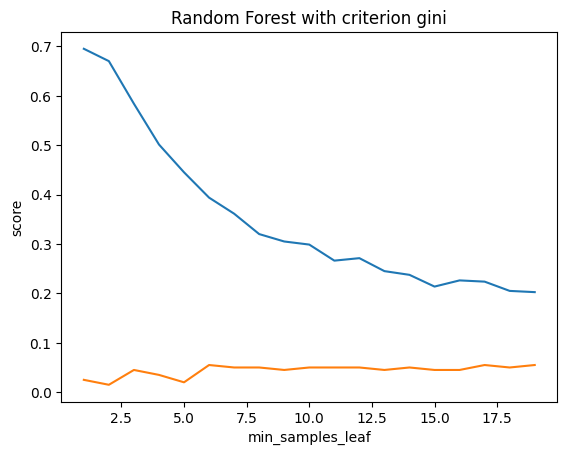

In [133]:
train_and_graph_forest_leafs(maximum_features= 20, criterion_used="gini")

Esta exploracion es altamente costosa;
en supercomputadores el entrenamiento puede costar dias, por tanto queremos decidir bien que queremos probar.